In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df = pd.read_csv('../datasets/ecommerceDataset.csv', names = ['target', 'feature'])
df.head(3)

,target,feature
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...


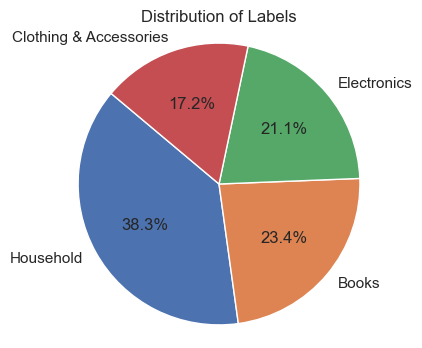

In [2]:
# Count the occurrences of each label
label_counts = df['target'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig('label_distribution.png', bbox_inches='tight')
plt.show()

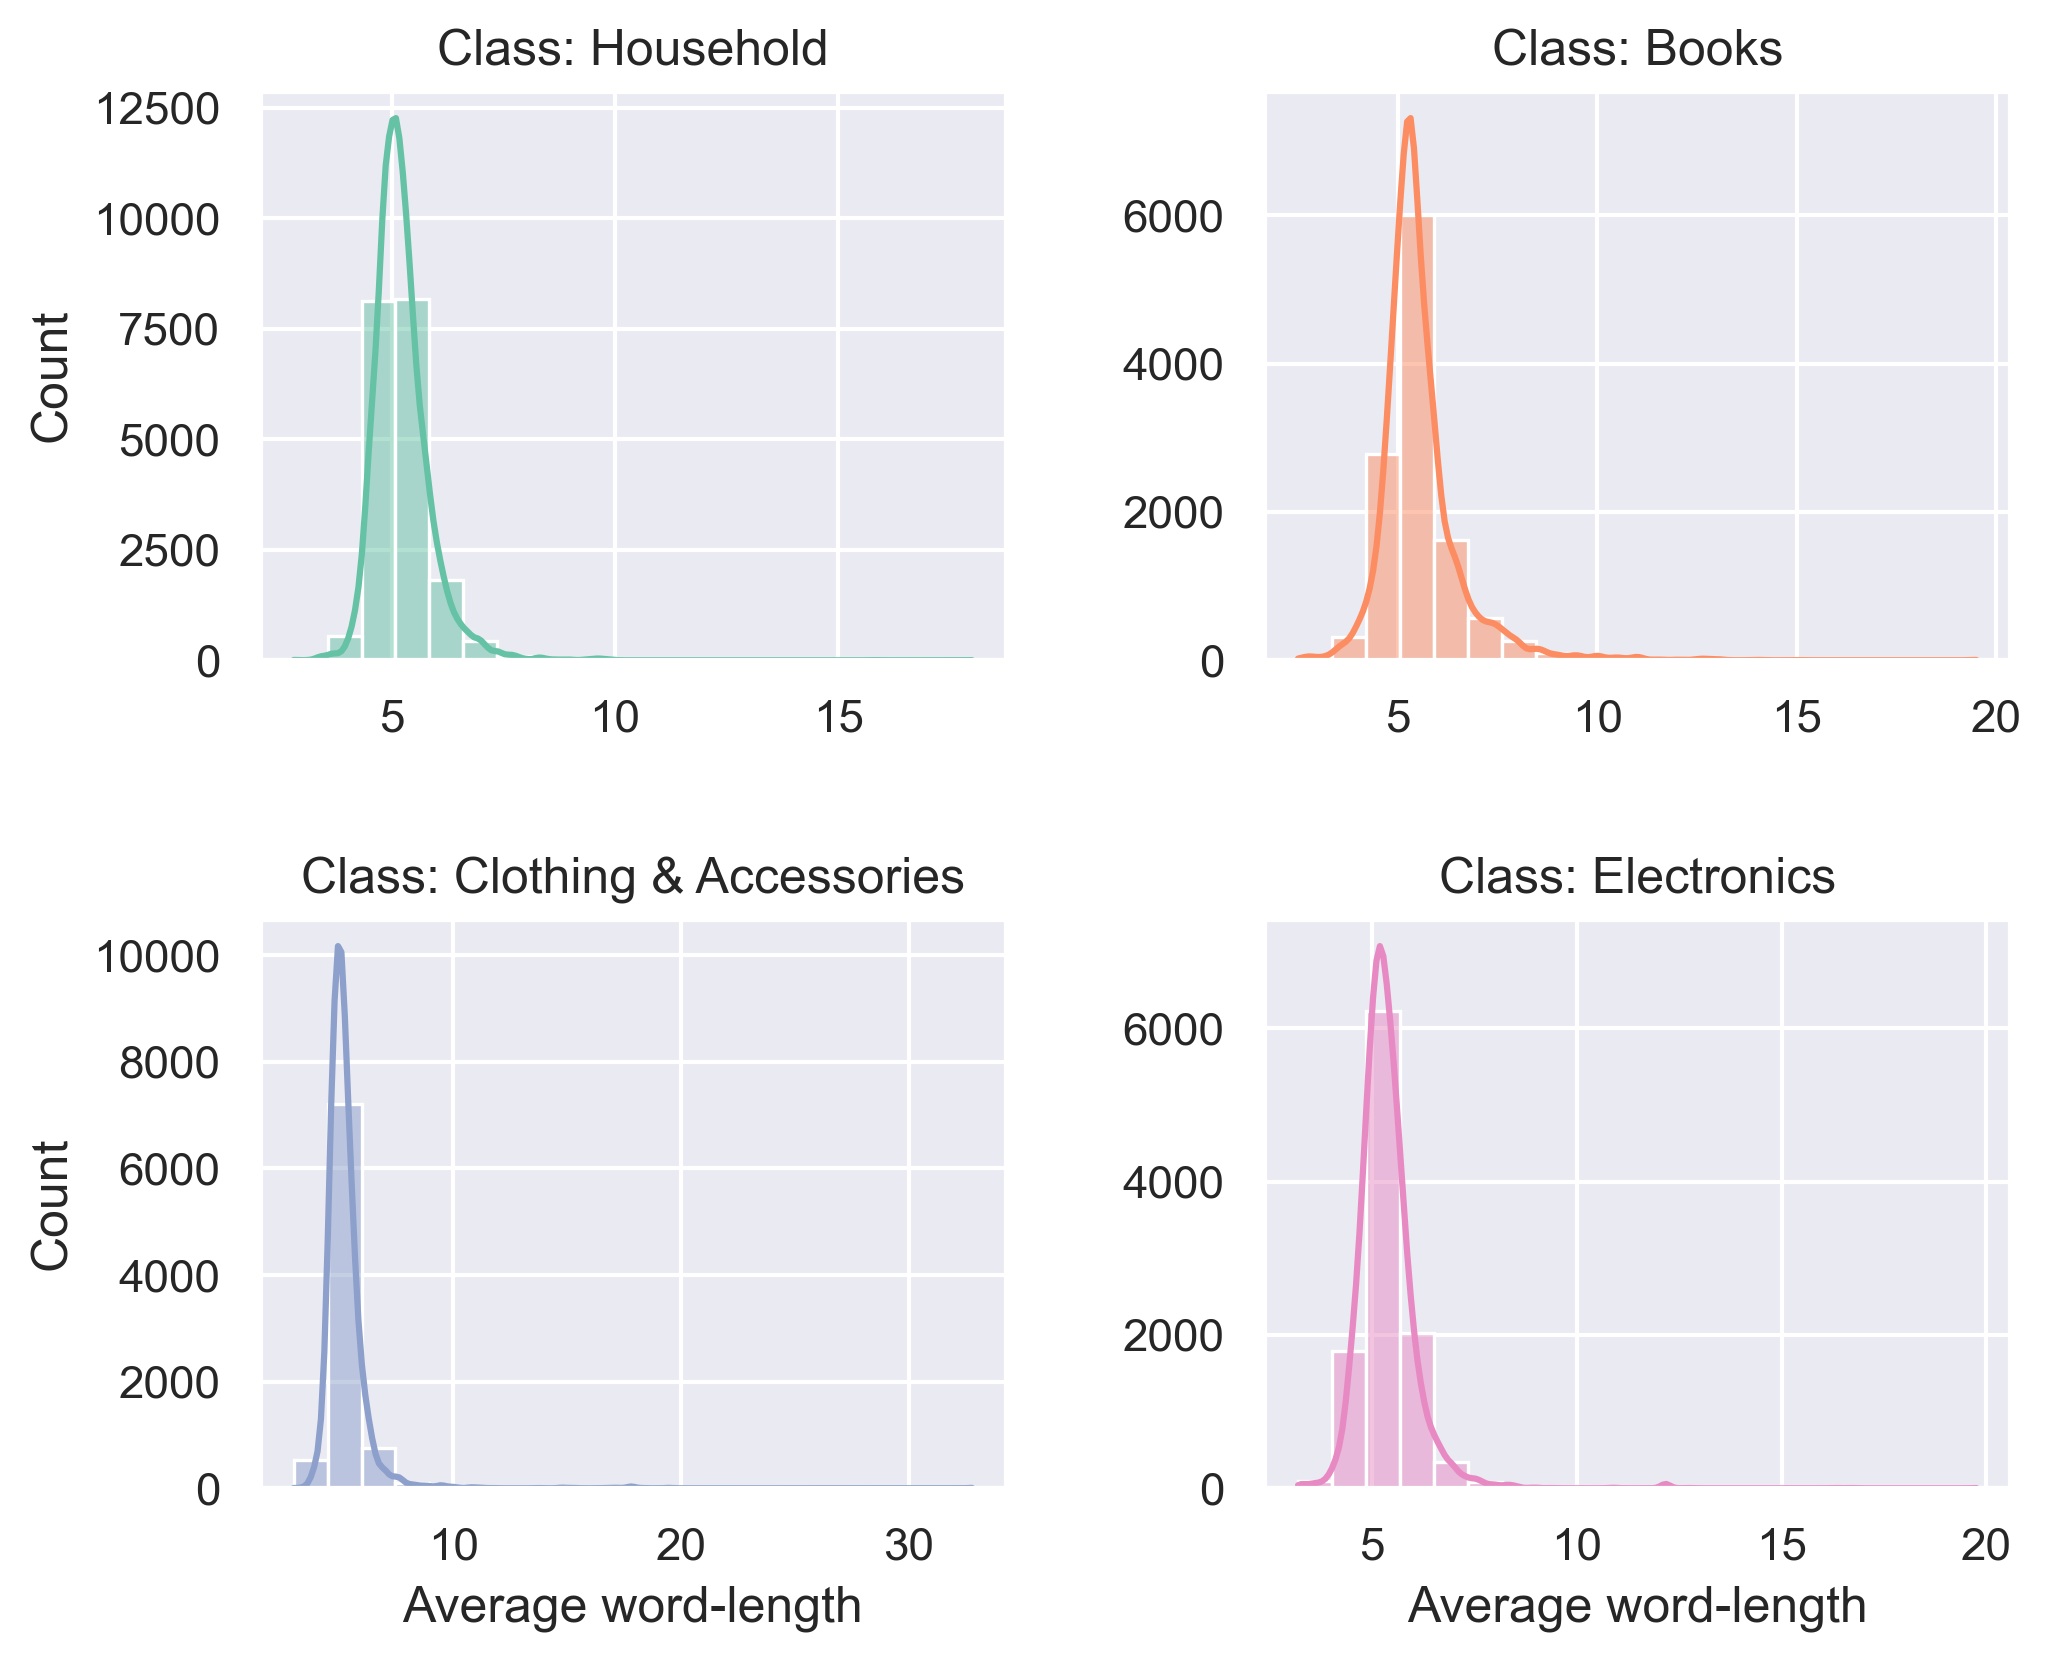

In [17]:
df = df[df['feature'].apply(lambda x: isinstance(x, str))]

# Split the 'feature' text and calculate the average word length
df['word_length'] = df['feature'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

# Create a custom color palette
custom_palette = sns.color_palette("Set2", n_colors=len(df['target'].unique()))

# Create separate histograms for each label with custom colors
fig, ax = plt.subplots(2, 2, figsize=(7, 6), sharey=False, dpi=300)

for i, label in enumerate(df['target'].unique()):
    label_data = df[df['target'] == label]
    sns.histplot(
        x=label_data['word_length'],
        bins=20,
        ax=ax[i // 2, i % 2],
        color=custom_palette[i],
        kde=True,
    ).set_title(f'Class: {label}')

for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot in high quality
#plt.savefig('word_length_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

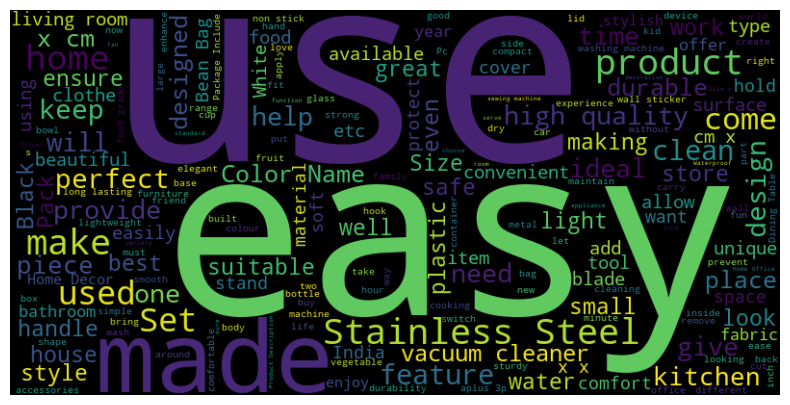

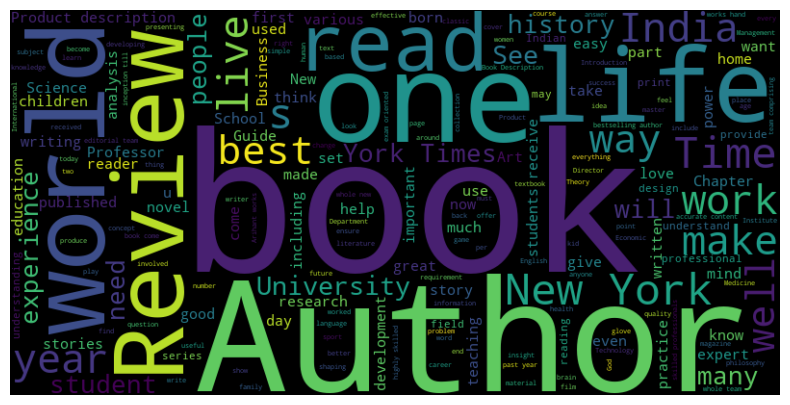

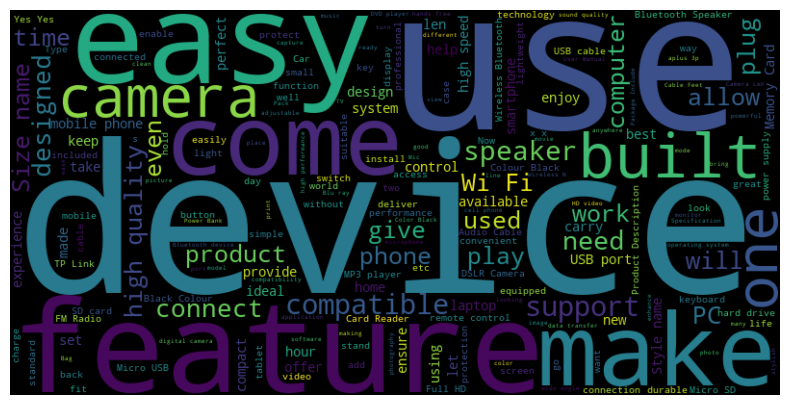

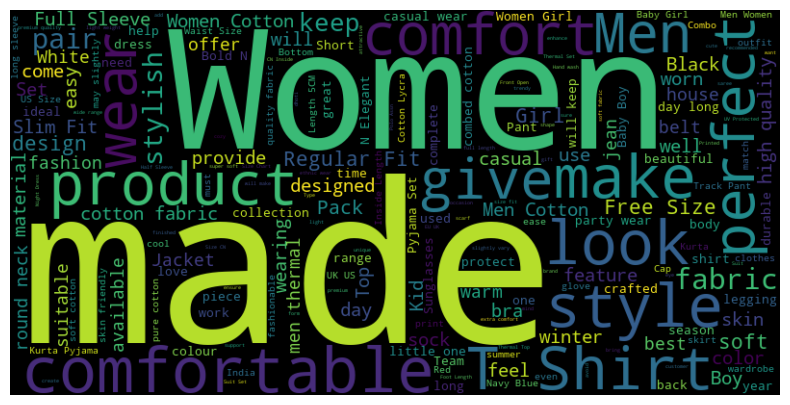

In [11]:
from wordcloud import WordCloud

target_categories = ['Household', 'Books', 'Electronics', 'Clothing & Accessories']

# Create a separate word cloud for each target category
for category in target_categories:
    # Filter the DataFrame by the current target category
    category_df = df[df['target'] == category]
    
    # Combine the text data from the 'feature' column for the current category into a single string
    text = ' '.join(category_df['feature'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Plot the WordCloud for the current category
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(f"Most Common Words in '{category}' Category")
    plt.show()